# Тестовое задание: Исследование показов рекламы

***Задача:*** Провести исследование показов рекламы с целью понять на сколько
отличается eCPM в зависимости от географии (города) юзера, версии ОС и
других параметров. Интересны любые инсайты и находки по eCPM-ам.

***Вспомогательная информация***
- profile_id – id юзера
- event_json - содержит данные о событии показа рекламы:
    - ad_type – формат рекламы (int, banner или rv)
    - placement – когда/где был показ рекламы в игре
    - view_index – номер показа конкретного формата рекламы для юзера (не
        поддерживается для баннеров)
    - revenue – доход от конкретного показа рекламы (eCPM = revenue * 1000)
    - ads_ltv – накапливающийся доход от рекламы, равен сумме всех revenue
        юзера
    - network_name – рекламная сеть, от которой был показ
- Остальные столбцы должны быть интуитивно понятны

***Содержание***
- [Подготовка данных](#start)
- [Анализ данных](#analisys)
    - [Распределение срдених eCPM пользователей для каждого формата рекламы](#q_1)
        - [Распределение средних eCPM по городам для каждого формата рекламы](#q_2)
        - [Средние eCPM городов с большим числом пользователей](#q_3)
        - [Средние eCPM городов с большим числом пользователей в разбивке по формату рекламы](#q_4)
        - [У какого формата рекламы более стабильный средний eCPM?](#q_5)
        - [Распределение средних eCPM по версиям OC](#q_6)
    - [Суммарные доходы по городам](#q_7)
        - [Суммарные доходы по городам в разбивке по формату рекламы ](#q_8)
        - [Суммарные доходы по версиям OC](#q_9)
        - [Суммарные доходы по версиям OC в разбивке по формату рекламы](#q_10)
- [Итоги исследования](#end)

## Подготовка данных <a id="start"></a>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from datetime import datetime, timedelta
from matplotlib import pyplot as plt
import json

Загружаем данные, смотрим первые 10 строк

In [2]:
data = pd.read_csv('C:\\Users\\User\\Desktop\\тестовое задание\\data.csv')

In [3]:
data.head(10)

,profile_id,os_version,device_manufacturer,device_model,device_type,device_locale,event_name,event_json,event_datetime,event_timestamp,event_receive_datetime,event_receive_timestamp,connection_type,operator_name,country_iso_code,city
0,JLjpGzDHBQm,11,Samsung,Galaxy Tab S6,tablet,en_US,c_ad_revenue,"{""ad_type"":""banner"",""placement"":"""",""view_index...",2022-02-04 20:02:28,1643994148,2022-02-06 17:58:19,1644159499,wifi,NaN,US,Norwalk
1,JLjpGzDHBQm,11,Samsung,Galaxy Tab S6,tablet,en_US,c_ad_revenue,"{""ad_type"":""banner"",""placement"":"""",""view_index...",2022-02-04 20:02:45,1643994165,2022-02-06 17:58:19,1644159499,wifi,NaN,US,Norwalk
2,JLkVacrzHY6,11,Google,Pixel 2,phone,en_US,c_ad_revenue,"{""ad_type"":""banner"",""placement"":"""",""view_index...",2022-02-05 17:53:05,1644072785,2022-02-06 16:59:29,1644155969,wifi,Verizon,US,Charlotte
3,JMC6wG3cX0f,10,Samsung,Galaxy S9,phone,en_US,c_ad_revenue,"{""ad_type"":""int"",""placement"":""next_level"",""vie...",2022-02-06 17:09:01,1644156541,2022-02-06 17:09:24,1644156564,wifi,T-Mobile,US,Cocoa
4,JLzWWTJfi1b,10,Samsung,Galaxy S9,phone,en_US,c_ad_revenue,"{""ad_type"":""banner"",""placement"":"""",""view_index...",2022-02-06 17:15:38,1644156938,2022-02-06 17:16:16,1644156976,cell,Verizon,US,NaN
5,JLzWWTJfi1b,10,Samsung,Galaxy S9,phone,en_US,c_ad_revenue,"{""ad_type"":""banner"",""placement"":"""",""view_index...",2022-02-06 17:15:53,1644156953,2022-02-06 17:16:16,1644156976,cell,Verizon,US,NaN
6,JLzWWTJfi1b,10,Samsung,Galaxy S9,phone,en_US,c_ad_revenue,"{""ad_type"":""banner"",""placement"":"""",""view_index...",2022-02-06 17:16:03,1644156963,2022-02-06 17:16:16,1644156976,cell,Verizon,US,NaN
7,JLzWWTJfi1b,10,Samsung,Galaxy S9,phone,en_US,c_ad_revenue,"{""ad_type"":""banner"",""placement"":"""",""view_index...",2022-02-06 17:16:23,1644156983,2022-02-06 17:17:11,1644157031,cell,Verizon,US,NaN
8,JLzWWTJfi1b,10,Samsung,Galaxy S9,phone,en_US,c_ad_revenue,"{""ad_type"":""banner"",""placement"":"""",""view_index...",2022-02-06 17:16:33,1644156993,2022-02-06 17:17:11,1644157031,cell,Verizon,US,NaN
9,JLzWWTJfi1b,10,Samsung,Galaxy S9,phone,en_US,c_ad_revenue,"{""ad_type"":""banner"",""placement"":"""",""view_index...",2022-02-06 17:16:53,1644157013,2022-02-06 17:17:11,1644157031,cell,Verizon,US,NaN


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 860079 entries, 0 to 860078
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype 
---  ------                   --------------   ----- 
 0   profile_id               860065 non-null  object
 1   os_version               860079 non-null  object
 2   device_manufacturer      860079 non-null  object
 3   device_model             860079 non-null  object
 4   device_type              860079 non-null  object
 5   device_locale            860079 non-null  object
 6   event_name               860079 non-null  object
 7   event_json               860079 non-null  object
 8   event_datetime           860079 non-null  object
 9   event_timestamp          860079 non-null  int64 
 10  event_receive_datetime   860079 non-null  object
 11  event_receive_timestamp  860079 non-null  int64 
 12  connection_type          860079 non-null  object
 13  operator_name            841200 non-null  object
 14  country_iso_code    

Меняем формат даты

In [5]:
data['event_datetime'] = pd.to_datetime(data['event_datetime'])
data['event_receive_datetime'] = pd.to_datetime(data['event_receive_datetime'])

Вытаскиваем данные из колонки `event_json` для удобства работы

In [6]:
event_json = []
for index in range(0,860078):
    event_json.append(json.loads(data['event_json'][index]))

In [7]:
data_event_json = pd.DataFrame(event_json)

In [8]:
data_event_json.head()

,ad_type,placement,view_index,session_view_index,cur_ticks,session_length,revenue,ads_ltv,ecpm_sma,normalized_ecpm_sma,value,currency,ad_country_code,network_name,ad_unit_id,ad_network_placement,creativeId
0,banner,,1,0,637795729492245130,705.88070,0.000510,0.487877,0.511508,0.511508,0.000510,USD,US,Google AdMob,64c6b1114ea8c1cc,ca-app-pub-7511632782617496/8825263691,CJ3XirfD5vUCFYPnKAUdG3MOYQ
1,banner,,1,0,637795729659949790,722.65120,0.000510,0.488387,0.511389,0.511389,0.000510,USD,US,Google AdMob,64c6b1114ea8c1cc,ca-app-pub-7511632782617496/8825263691,CNa-lL_D5vUCFZrpKAUdU2QBDQ
2,banner,,1,0,637796515863735930,431.81290,0.002386,0.678479,0.928597,0.928597,0.002386,USD,US,APPLOVIN_EXCHANGE,64c6b1114ea8c1cc,banner_regular,pandora-58
3,int,next_level,1,1,637797353426827330,125.94960,0.013894,0.013894,13.782633,13.893784,0.013894,USD,US,AppLovin,3ab7705b07ebb75f,inter_regular,13045364
4,banner,,1,0,637797357392197840,12.71129,0.006828,0.060571,1.660282,1.660282,0.006828,USD,US,Google AdMob,64c6b1114ea8c1cc,ca-app-pub-7511632782617496/6197324251,CMTi5e-h6_UCFUdVwQodt9EIMw


Выделяем нужные столбцы из начального датафрейма, объединяем с нужными для анализа данными из колонки `event_json`

In [9]:
data = data[['profile_id','os_version','device_manufacturer','device_type','event_datetime','event_receive_datetime','city']]

In [10]:
data.head()

,profile_id,os_version,device_manufacturer,device_type,event_datetime,event_receive_datetime,city
0,JLjpGzDHBQm,11,Samsung,tablet,2022-02-04 20:02:28,2022-02-06 17:58:19,Norwalk
1,JLjpGzDHBQm,11,Samsung,tablet,2022-02-04 20:02:45,2022-02-06 17:58:19,Norwalk
2,JLkVacrzHY6,11,Google,phone,2022-02-05 17:53:05,2022-02-06 16:59:29,Charlotte
3,JMC6wG3cX0f,10,Samsung,phone,2022-02-06 17:09:01,2022-02-06 17:09:24,Cocoa
4,JLzWWTJfi1b,10,Samsung,phone,2022-02-06 17:15:38,2022-02-06 17:16:16,NaN


In [11]:
data_event_json = data_event_json[['ad_type','revenue','network_name']].reset_index()
data = data.reset_index()

In [12]:
data = data.merge(data_event_json, on='index')

Получаем таблицу для анализа

In [13]:
data

,index,profile_id,os_version,device_manufacturer,device_type,event_datetime,event_receive_datetime,city,ad_type,revenue,network_name
0,0,JLjpGzDHBQm,11,Samsung,tablet,2022-02-04 20:02:28,2022-02-06 17:58:19,Norwalk,banner,0.000510,Google AdMob
1,1,JLjpGzDHBQm,11,Samsung,tablet,2022-02-04 20:02:45,2022-02-06 17:58:19,Norwalk,banner,0.000510,Google AdMob
2,2,JLkVacrzHY6,11,Google,phone,2022-02-05 17:53:05,2022-02-06 16:59:29,Charlotte,banner,0.002386,APPLOVIN_EXCHANGE
3,3,JMC6wG3cX0f,10,Samsung,phone,2022-02-06 17:09:01,2022-02-06 17:09:24,Cocoa,int,0.013894,AppLovin
4,4,JLzWWTJfi1b,10,Samsung,phone,2022-02-06 17:15:38,2022-02-06 17:16:16,NaN,banner,0.006828,Google AdMob
...,...,...,...,...,...,...,...,...,...,...,...
860073,860073,JLSQY2nx1NQ,12,Samsung,phone,2022-02-03 08:29:12,2022-02-03 08:29:37,Elmira,banner,0.000020,APPLOVIN_EXCHANGE
860074,860074,JLSQY2nx1NQ,12,Samsung,phone,2022-02-03 08:29:27,2022-02-03 08:29:37,Elmira,banner,0.000020,APPLOVIN_EXCHANGE
860075,860075,JLKWwju79CA,12,Samsung,phone,2022-02-03 02:12:51,2022-02-03 02:14:48,Cherry Hill,banner,0.006740,Google AdMob
860076,860076,JLKWwju79CA,12,Samsung,phone,2022-02-03 02:13:06,2022-02-03 02:14:48,Cherry Hill,banner,0.002780,Google AdMob


За какой период мы имеем данные?

In [14]:
print(data['event_datetime'].min())
print(data['event_datetime'].max())

2022-01-29 17:42:32
2022-02-07 23:59:59


Мы имеем данные с 29.01.2022 по 07.02.2022 

Проверим пропуски

In [15]:
data.isna().sum()

index                          0
profile_id                    14
os_version                     0
device_manufacturer            0
device_type                    0
event_datetime                 0
event_receive_datetime         0
city                      323708
ad_type                        0
revenue                        0
network_name                   0
dtype: int64

Заменим пропуски в колонке `city`  на `unknown`, так как таких пропусков очень много и удалим строки с неизвестными `profile_id`, так как таких пропусков всего 14

In [16]:
data['city'] = data['city'].fillna('unknown')
data = data.dropna()

Проверим данные на дубликаты

In [17]:
data.duplicated().sum()

0

Дубликаты отсутствуют

Проверим данные на выбросы

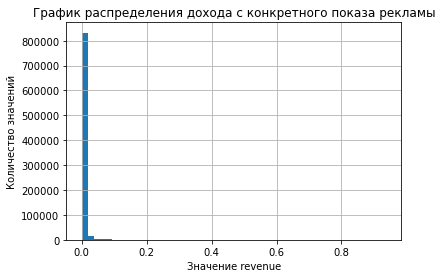

In [18]:
data['revenue'].hist(bins=50)
plt.title('График распределения дохода с конкретного показа рекламы')
plt.xlabel('Значение revenue')
plt.ylabel('Количество значений')
plt.show()

По гистограмме можно сказать что основные данные лежат в промежутке до 0.2, но есть невидимые на графике единичные выбросы до 0.8, которые могут сильно повлиять на результаты анализа, избавимся от них.

Удалим из данных 5% данных, это не повлияет на исследование и мы избавимся от выбросов

In [19]:
np.percentile(data['revenue'],95)

0.007574941

In [20]:
data = data.query('revenue < 0.007574941')

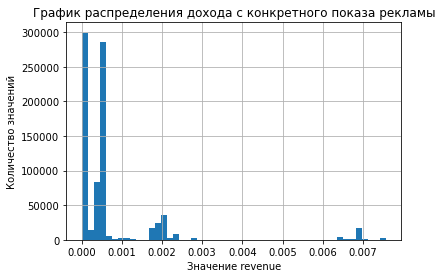

In [21]:
data['revenue'].hist(bins=50)
plt.title('График распределения дохода с конкретного показа рекламы')
plt.xlabel('Значение revenue')
plt.ylabel('Количество значений')
plt.show()

Теперь распределение выглядит лучше, есть небольшое количество значений в районе 0.007, но основные значения находятся до 0.001

Добавим колонку `eCPM` умножив `revenue` на 1000

In [22]:
data['eCPM'] = data['revenue'] * 1000

## Анализ данных <a id="analisys"></a>

### Распределение срдених eCPM пользователей для каждого формата рекламы <a id="q_1"></a>

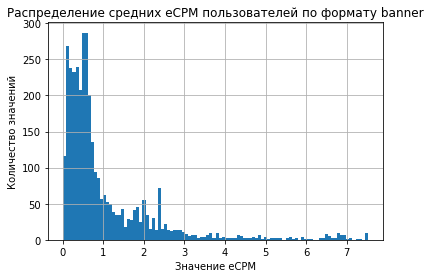

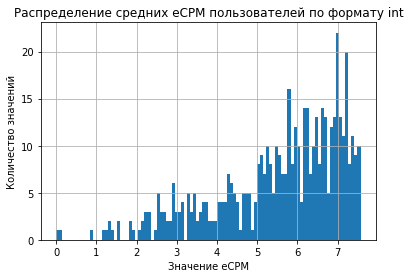

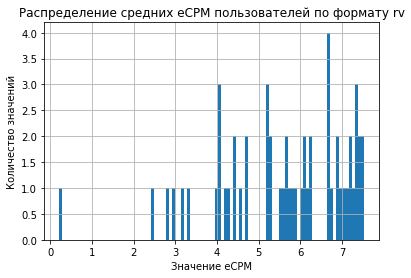

In [23]:
for index in data['ad_type'].unique():
    data.loc[data['ad_type'] == index].groupby('profile_id')['eCPM'].mean().hist(bins=100)
    plt.title(f'Распределение средних eCPM пользователей по формату {index}')
    plt.xlabel('Значение eCPM')
    plt.ylabel('Количество значений')
    plt.show()

По данным графикам можно заметить, что больше всего показов у формата рекламы `banner`, но при этом средние значения eCPM у большинства пользователей до 2, формат рекламы `int` имеет меньше показов, но средние значения eCPM у большинства наблюдений в несколько раз выше чем у формата `banner`, формат `rv` имеет очень маленькое количество наблюдений при схожих с `int` средних значениях eCPM. На это стоит обратить внимание. Можно попробовать увеличить потребность пользователей просматривать видео для получения монеток и ресурсов, тем самым увеличить прибыль.

Убедимся в полученных выводах посмотрев на доходы с каждого формата рекламы

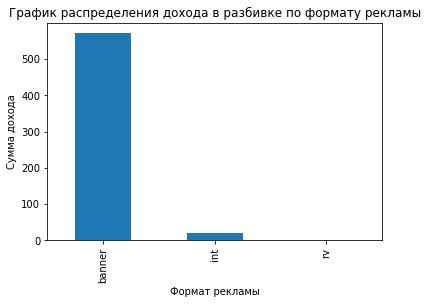

In [24]:
data.groupby('ad_type')['revenue'].sum().plot(kind='bar')
plt.title('График распределения дохода в разбивке по формату рекламы')
plt.xlabel('Формат рекламы')
plt.ylabel('Сумма дохода')
plt.show()

Посмотрим сколько событий происходит по форматам рекламы

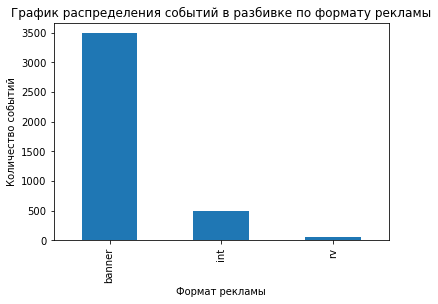

In [25]:
data.groupby('ad_type')['profile_id'].nunique().plot(kind='bar')
plt.title('График распределения событий в разбивке по формату рекламы')
plt.xlabel('Формат рекламы')
plt.ylabel('Количество событий')
plt.show()

`banner` просматривают преимущественно большее число пользователей 

### Распределение средних eCPM по городам для каждого формата рекламы <a id="q_2"></a>

Проверим как распределены пользователи по городам, в каких городах больше всего пользователей? 

In [26]:
top_cities = data.groupby('city')['profile_id'].nunique().reset_index().sort_values(by='profile_id', ascending=False).head(30).reset_index(drop=True)
top_cities

,city,profile_id
0,unknown,1542
1,Minneapolis,74
2,New York,69
3,Houston,54
4,Chicago,53
5,Denver,52
6,Charlotte,50
7,Los Angeles,45
8,Dallas,43
9,Seattle,40


У нас очень много пользователей с неизвестным городом, в 20 раз превышает количество пользователей в самом наполненном игроками городе. Нужно обратить на это внимание в дальнейшем. 

Посмотрим сколько пользователей в городах с самым высоким средним `eCPM`

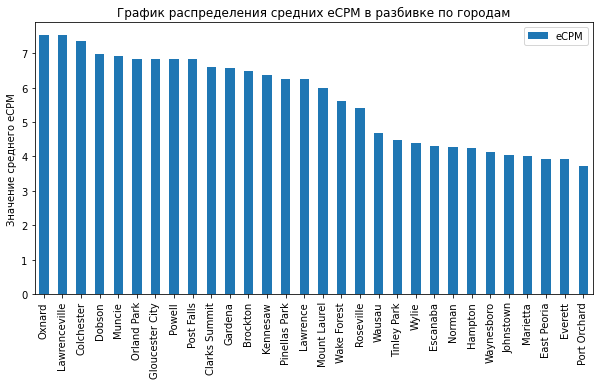

In [27]:
data.groupby('city')['eCPM'].mean().reset_index().sort_values(by='eCPM', ascending=False).head(30).plot(kind='bar', x='city', figsize=(10,5))
plt.title('График распределения средних eCPM в разбивке по городам')
plt.xlabel('')
plt.ylabel('Значение среднего eCPM')
plt.show()

In [28]:
ecpm = data.groupby('city')['eCPM'].mean().reset_index().sort_values(by='eCPM', ascending=False).head(30)
ecpm_list = list(ecpm['city'])
data.query('city in @ecpm_list').groupby('city')['profile_id'].nunique()

city
Brockton           1
Clarks Summit      1
Colchester         1
Dobson             1
East Peoria        3
Escanaba           1
Everett            3
Gardena            1
Gloucester City    1
Hampton            2
Johnstown          1
Kennesaw           1
Lawrence           2
Lawrenceville      1
Marietta           2
Mount Laurel       2
Muncie             1
Norman             2
Orland Park        1
Oxnard             1
Pinellas Park      2
Port Orchard       1
Post Falls         1
Powell             1
Roseville          2
Tinley Park        1
Wake Forest        1
Wausau             1
Waynesboro         4
Wylie              1
Name: profile_id, dtype: int64

Что и требовалось доказать, в городах с высоким `eCPM` зачастую очень мало пользователей, считаю есть два варианта
1. делать акцент на городах с большим числом пользователей и повышать `eCPM` в этих городах
2. Привлекать больше пользователей в городах с высоким `eCPM`

### Средние eCPM городов с большим числом пользователей <a id="q_3"></a>

In [29]:
top_cities_list = list(top_cities['city'])

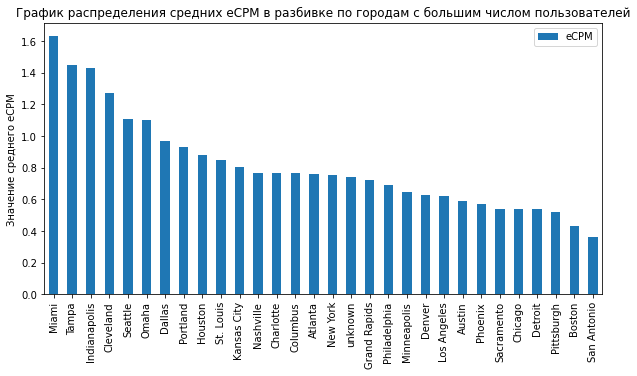

In [30]:
data.query('city in @top_cities_list').groupby('city')['eCPM'].mean().reset_index().sort_values(by='eCPM', ascending=False).plot(kind='bar', x='city', figsize=(10,5))
plt.title('График распределения средних eCPM в разбивке по городам с большим числом пользователей')
plt.xlabel('')
plt.ylabel('Значение среднего eCPM')
plt.show()

Интересно что `minneapolis` и `New York` далеко не в первой десятке по среднему `eCPM`, но на первых местах по количеству пользователей, `Houston` на 9 месте по среднему `eCPM`. Можно взять это на вооружение и повышать `eCPM` в топ-10 городов по количеству пользователей.

### Средние eCPM городов с большим числом пользователей в разбивке по формату рекламы <a id="q_4"></a>

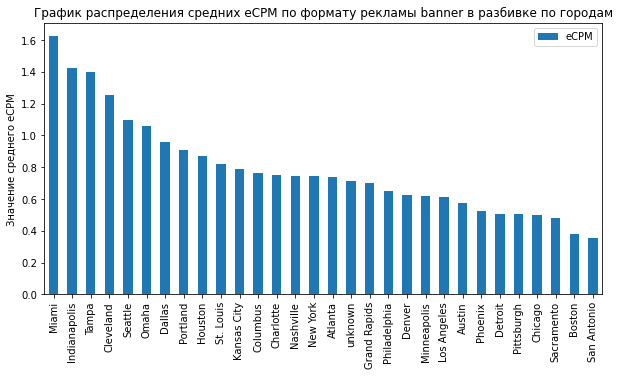

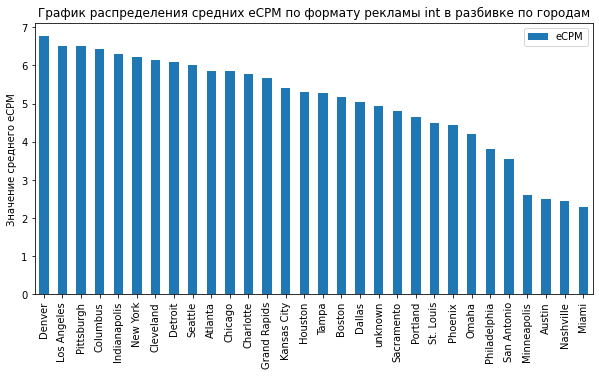

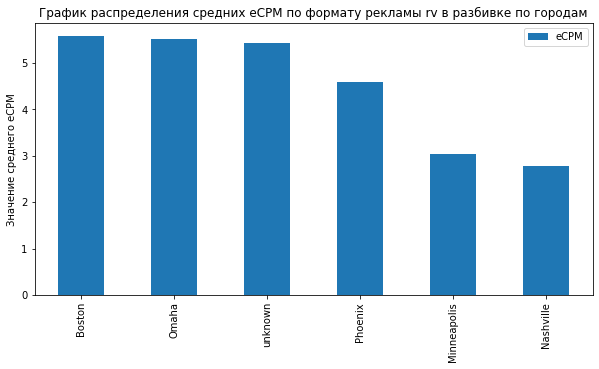

In [31]:
for index in ["banner","int","rv"]:
    data.query(f'ad_type == "{index}" & city in @top_cities_list').groupby('city')['eCPM'].mean().reset_index().sort_values(by='eCPM', ascending=False).plot(kind='bar', x='city', figsize=(10,5))
    plt.title(f'График распределения средних eCPM по формату рекламы {index} в разбивке по городам')
    plt.xlabel('')
    plt.ylabel('Значение среднего eCPM')
    plt.show()
    

Заметим что формат рекламы `rv` используют довольно редко, в чём мы убедились ранее, но средний `eCPM` у этого формата достойный. Можно обратить на это внимание и увеличить потребность пользователей в использовании дополнительных монеток и т.д. 

### У какого формата рекламы более стабильный средний eCPM? <a id="q_5"></a>

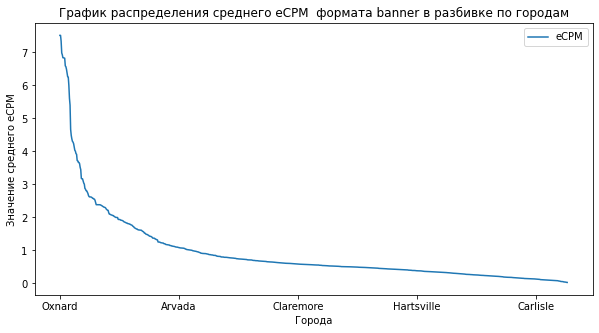

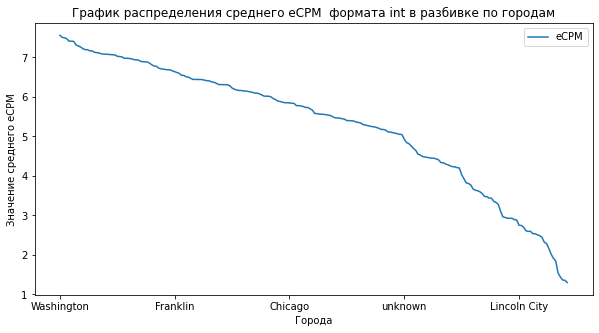

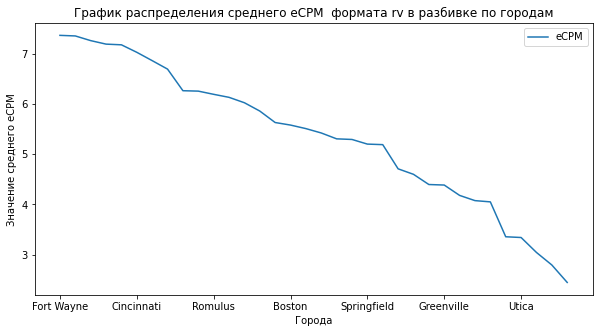

In [32]:
for index in ["banner","int","rv"]:
    data.query(f'ad_type == "{index}"').groupby('city')['eCPM'].mean().reset_index().sort_values(by='eCPM', ascending=False).plot(kind='line', x='city', figsize=(10,5))
    plt.title(f'График распределения среднего eCPM  формата {index} в разбивке по городам')
    plt.xlabel('Города')
    plt.ylabel('Значение среднего eCPM')
    plt.show()

Заметим что у форматов `int` и `rv` средний `eCPM` по городам держится стабильнее `banner`

### Распределение средних eCPM по версиям OC <a id="q_6"></a>

Сначала посмотрим на общую картину без разбивки по формату рекламы

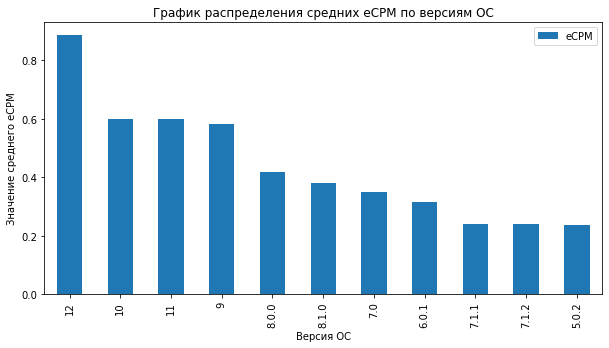

In [33]:
data.groupby('os_version')['eCPM'].mean().reset_index().sort_values(by='eCPM', ascending=False).plot(kind='bar', x='os_version', figsize=(10,5))
plt.title('График распределения средних eCPM по версиям ОС')
plt.xlabel('Версия ОС')
plt.ylabel('Значение среднего eCPM')
plt.show()

Более новые OC имеют более высокое значение среднего `eCPM`

Смотрим в разбивке по формату рекламы

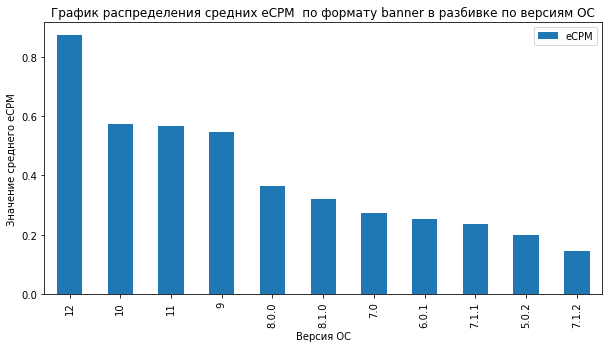

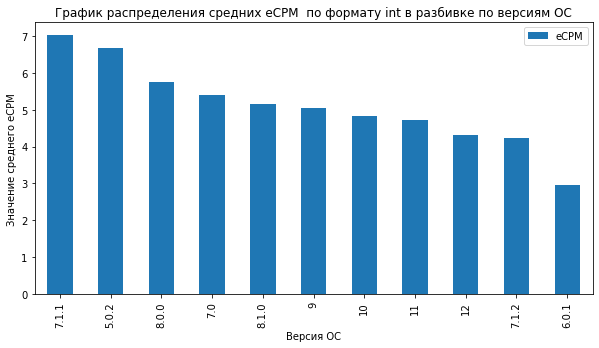

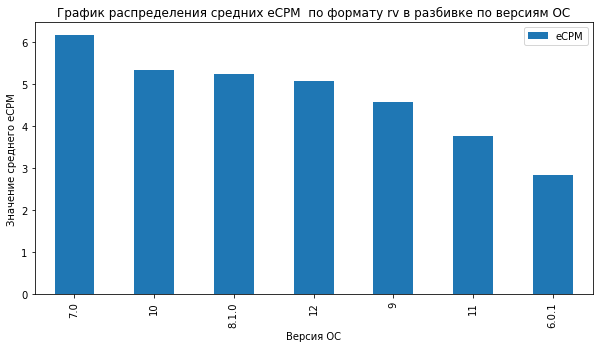

In [34]:
for index in ["banner","int","rv"]:
    data.query(f'ad_type == "{index}"').groupby('os_version')['eCPM'].mean().reset_index().sort_values(by='eCPM', ascending=False).plot(kind='bar', x='os_version', figsize=(10,5))
    plt.title(f'График распределения средних eCPM  по формату {index} в разбивке по версиям ОС')
    plt.xlabel('Версия ОС')
    plt.ylabel('Значение среднего eCPM')
    plt.show()

По версиям OC у формата `banner` заметно выше `eCPM` на более новых версиях, но само значение маленькое, всего 0,9. Без разбивки на рекламу такой же результат, потому что чаще всего используется `banner`, но также как и с городами средний `eCPM` у форматов `int` и `rv` на много выше. 

### Суммарные доходы по городам <a id="q_7"></a>

Посмотрим на общие доходы по городам без разбивки на форматы рекламы 

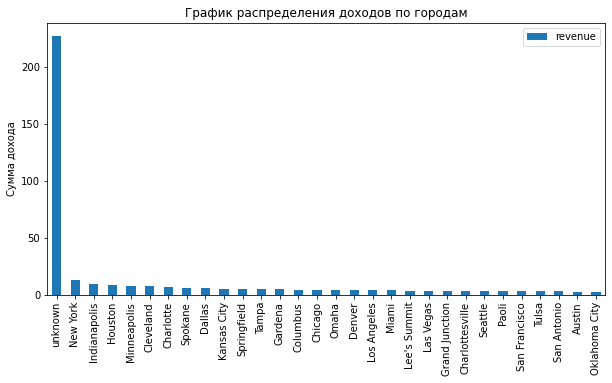

In [35]:
data.groupby('city')['revenue'].sum().reset_index().sort_values(by='revenue', ascending=False).head(30).plot(kind='bar', x='city', figsize=(10,5))
plt.title('График распределения доходов по городам')
plt.xlabel('')
plt.ylabel('Сумма дохода')
plt.show()

In [36]:
data.query('city == "unknown"')['revenue'].sum() / data.query('city != "unknown"')['revenue'].sum() * 100

62.09718656014878

Целых 62% дохода не содержит информации о городе пользователя.

Слишком много неизвестных городов, посмотрим на распределение без них для лучшей читабельности графика

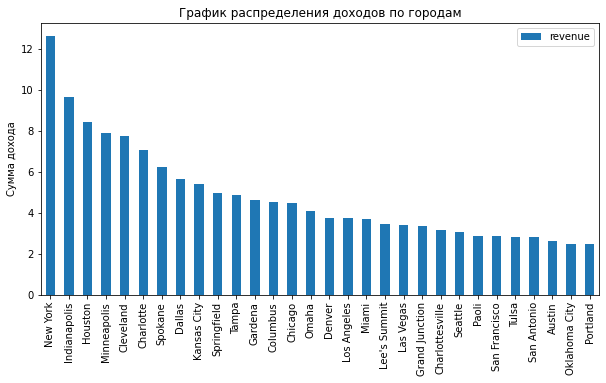

In [37]:
data.query('city != "unknown"').groupby('city')['revenue'].sum().reset_index().sort_values(by='revenue', ascending=False).head(30).plot(kind='bar', x='city', figsize=(10,5))
plt.title('График распределения доходов по городам')
plt.xlabel('')
plt.ylabel('Сумма дохода')
plt.show()

Заметим что `New York`, `Huston` и `minneapolis` в первой пятёрке по прибыли, а также в первый тройке по количеству пользователей, делаем вывод что эти города имеют не такой высокий средний `eCPM`, но делают высокие доходы благодаря числу пользователей

### Суммарные доходы по городам в разбивке по формату рекламы <a id="q_8"></a>

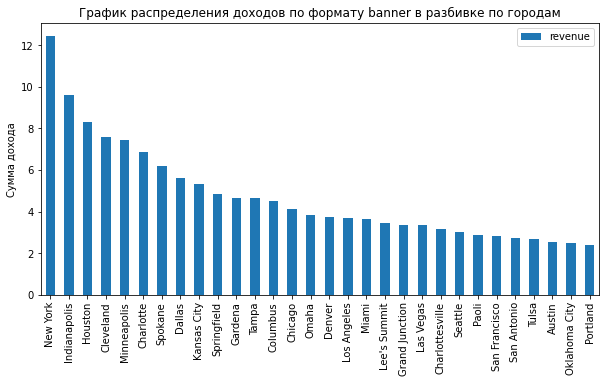

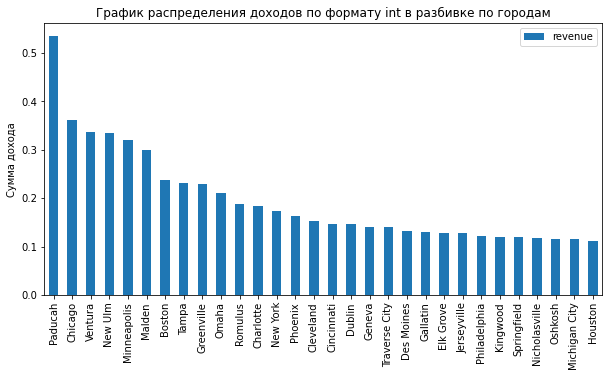

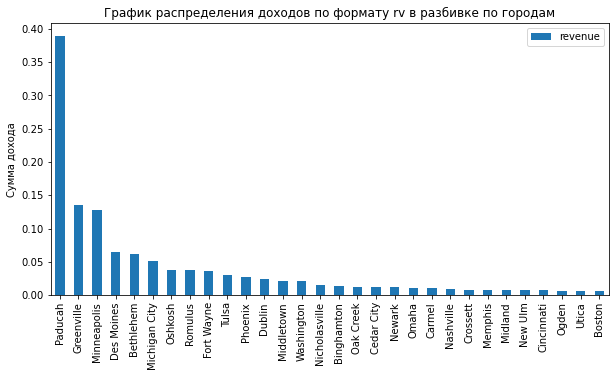

In [38]:
for index in ["banner","int","rv"]:
    data.query(f'ad_type == "{index}" & city != "unknown"').groupby('city')['revenue'].sum().reset_index().sort_values(by='revenue', ascending=False).head(30).plot(kind='bar', x='city', figsize=(10,5))
    plt.title(f'График распределения доходов по формату {index} в разбивке по городам')
    plt.xlabel('')
    plt.ylabel('Сумма дохода')
    plt.show()

Формат `banner` отлично справляется со своей задачей и приносит больше всего прибыли как раз в городах с большим количеством пользователей, чего нельзя сказать про `int` и `rv`. 

### Суммарные доходы по версиям OC <a id="q_9"></a>

Смотрим на доходы без разбивки по формату рекламы

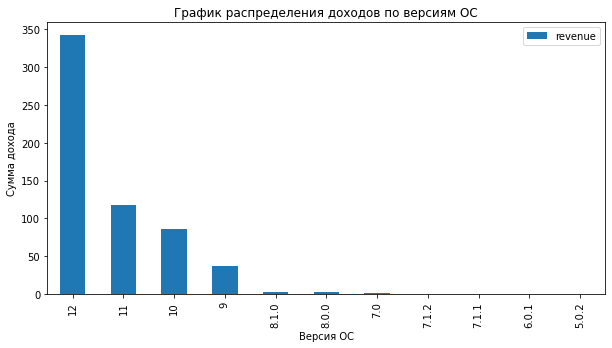

In [39]:
data.groupby('os_version')['revenue'].sum().reset_index().sort_values(by='revenue', ascending=False).head(30).plot(kind='bar', x='os_version', figsize=(10,5))
plt.title('График распределения доходов по версиям ОС')
plt.xlabel('Версия ОС')
plt.ylabel('Сумма дохода')
plt.show()

Более новые версии OC приносят больше всего дохода, причем 12 версия превышает остальные в 3 раза по доходам.

### Суммарные доходы по версиям OC в разбивке по формату рекламы <a id="q_10"></a>

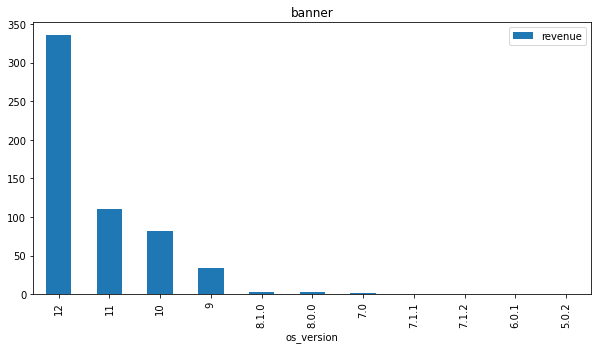

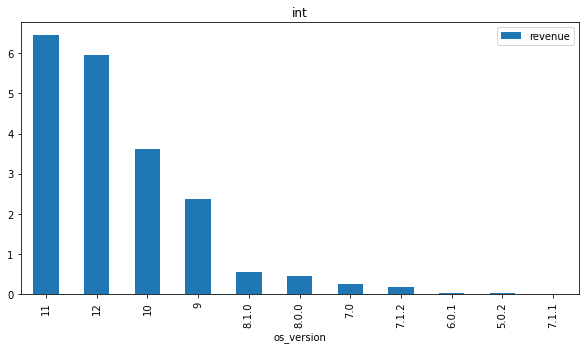

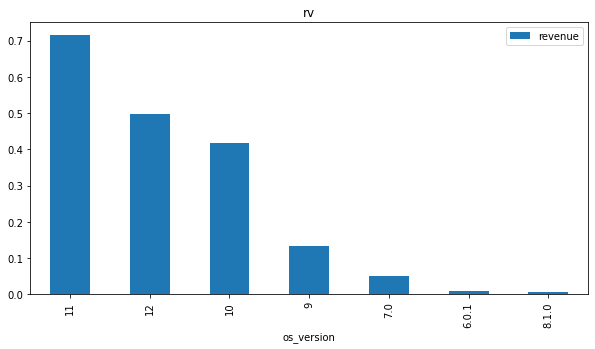

In [40]:
for index in ["banner","int","rv"]:
    data.query(f'ad_type == "{index}"').groupby('os_version')['revenue'].sum().reset_index().sort_values(by='revenue', ascending=False).head(30).plot(kind='bar', x='os_version', figsize=(10,5))
    plt.title(f'{index}')

Мы наблюдаем те же результаты при разбивке по формату рекламы. Более новые версии OC приносят больше доходов на всех форматах рекламы. Старые версии ОС практически не приносят дохода. Скорее всего пользователей с более старой версией ОС гораздо меньше чем с новой, поэтому не смотря на свой высокий `eCPM` более старые версии ОС не смогут приносить больше доходов. Проверим как распределены пользователи по версиям ОС чтобы доказать это.

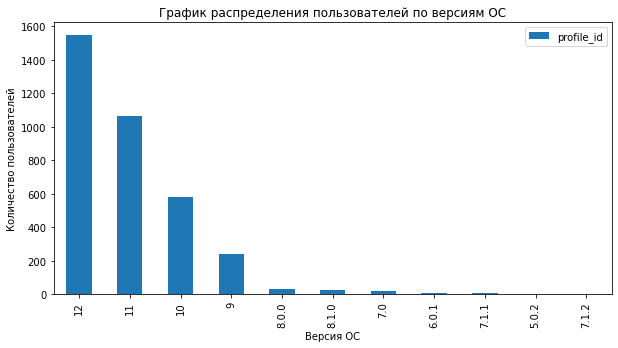

In [41]:
data.groupby('os_version')['profile_id'].nunique().reset_index().sort_values(by='profile_id', ascending=False).plot(kind='bar', x='os_version', figsize=(10,5))
plt.title('График распределения пользователей по версиям ОС')
plt.xlabel('Версия ОС')
plt.ylabel('Количество пользователей')
plt.show()

## Итоги исследования <a id="end"></a>

В ходе исследования мы выяснили что 62% пользователей не имеют информации о городе. Нашли пропуски в данных (отсутствие id пользоватлея, название города). Дубликаты не обнаружены. Мы создали удобную таблицу для работы и начали анализ.

***Основные инсайты:***

1. Больше всего прибыли идёт с формата рекламы `banner`, это основной источник дохода. 
2. Большинство пользователей имеют более новую версию ОС

***eCPM***

- У основного формата `banner` довольно низкий показатель среднего `eCPM` по городам и версиям ОС относительно форматов `int` И `rv` (в несколько раз ниже), высокая прибыль с этого формата идёт благодаря большому количеству пользователей.
- Форматы `int` И `rv` имеют высокий показатель среднего `eCPM` по городам и версиям ОС, но в отличие от `banner` на более старых версиях ОС

(Возможно есть способы оптимизировать эти форматы рекламы для более новых версий ОС, а также увеличить потребность пользователей в дополнительных монетках и т.д.)

***Доходы***

- Топ-5 городов по доходам
    - New York
    - Indianapolis
    - Huston
    - Minneapolis
    - Cleveland
    
Основной формат `banner` имеет те же города в топ-5 прибыльных городов, но форматы `int` и `rv` приносят доход с других городов. 

- Топ-3 версии ОС по доходам
    - 12
    - 11
    - 10
    
Причем у основного формата `banner` доход по версии 12 превышает версию 11 более чем в 2 раза!

Проект выполнил: Алексей Коновалов

Мои учебные проекты дашбордов в Tableau: 

https://public.tableau.com/app/profile/alexey.konovalov/viz/Yandex_Zen_16554461965320/Dashboard1?publish=yes
https://public.tableau.com/app/profile/alexey.konovalov/viz/WorldsPopulationDashboard_16548687671680/Dashboard1